In [21]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Read input data
weather_frame = pd.read_csv(
    "../data/terminwerte_TU_00183_akt/produkt_tu_termin_20240413_20251014_00183.txt", sep=";")
weather_frame.head()

,STATIONS_ID,MESS_DATUM,QN_4,TT_TER,RF_TER,eor
0,183,2024041306,9,9.9,90.0,eor
1,183,2024041312,9,14.0,82.0,eor
2,183,2024041318,9,12.1,85.0,eor
3,183,2024041406,9,9.0,78.0,eor
4,183,2024041412,9,10.6,69.0,eor


In [23]:
# Data transformation
# Rename columns, drop unused columns
weather_frame = weather_frame.drop(['STATIONS_ID', 'eor'], axis=1)
weather_frame = weather_frame.rename(columns={
    'MESS_DATUM': 'datetime',
    'QN_4': 'quality',
    'TT_TER': 'temp_C',
    'RF_TER': 'rel_humidity_pct'
})

# Convert datetime into a format that pandas understands and mathplotlib can plot
weather_frame['datetime'] = pd.to_datetime(weather_frame['datetime'], format='%Y%m%d%H')
weather_frame = weather_frame.set_index('datetime')

weather_frame.head()

,quality,temp_C,rel_humidity_pct
datetime,,,
2024-04-13 06:00:00,9,9.9,90.0
2024-04-13 12:00:00,9,14.0,82.0
2024-04-13 18:00:00,9,12.1,85.0
2024-04-14 06:00:00,9,9.0,78.0
2024-04-14 12:00:00,9,10.6,69.0


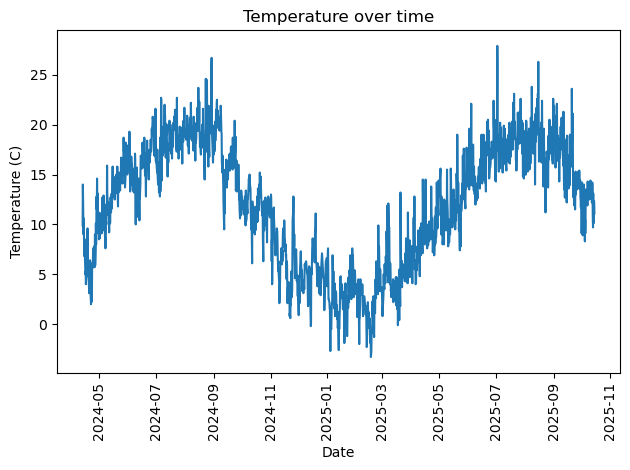

In [24]:
# Plot a time series with temperature
plt.plot(weather_frame['temp_C'])
plt.title("Temperature over time")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# 